In [14]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('../results/occupation/unseen_data_occupation.csv', index_col=0)
data = data.drop(['occupation', 'model_type'], axis=1)
data = data.groupby(['region_name', 'decade']).sum().reset_index()
data_sorted = data.sort_values(by='count_cps', ascending=False)
test = data_sorted[data_sorted['region_name'] == 'Chinese world']



In [60]:

bigger_reggions = {'Western Europe':['France',
 'German world',
 'Italy',
 'Japan',
 'Low countries',
 'Nordic countries',
 'Portugal',
 'Spain',
 'United Kingdom'], 
 'mediterranean World':['Greek World', 'Latin World'], 'Muslim world':['Arabic world', 'Persian world']}

final = []

for region in list(bigger_reggions.keys()):

    data_bigger = data_sorted.copy()
    data_bigger['region_name'][data_bigger['region_name'].isin(bigger_reggions[region])] = region
    data_bigger = data_bigger[data_bigger['region_name']==region]
    data_bigger = data_bigger.groupby(['region_name', 'decade']).sum().reset_index()
    final.append(data_bigger)

df_final = pd.concat([x for x in final])
final_unseen = pd.concat([data_sorted, df_final])

data_sorted = final_unseen.copy()
set(data_sorted.region_name)

/var/folders/lx/9b13r6ln63jb54_3xlf9b_380000gn/T/ipykernel_50519/609578406.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bigger['region_name'][data_bigger['region_name'].isin(bigger_reggions[region])] = region
/var/folders/lx/9b13r6ln63jb54_3xlf9b_380000gn/T/ipykernel_50519/609578406.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bigger['region_name'][data_bigger['region_name'].isin(bigger_reggions[region])] = region
/var/folders/lx/9b13r6ln63jb54_3xlf9b_380000gn/T/ipykernel_50519/609578406.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the 

{'Arabic world',
 'Balkans',
 'Central Europe',
 'Chinese world',
 'East Slavic',
 'Eastern Europe',
 'France',
 'German world',
 'Greek World',
 'Indian world',
 'Italy',
 'Japan',
 'Korea',
 'Latin World',
 'Low countries',
 'Muslim world',
 'Nordic countries',
 'Persian world',
 'Portugal',
 'Spain',
 'United Kingdom',
 'Western Europe',
 'mediterranean World'}

In [61]:
data_group = (data_sorted.groupby('region_name')['count_cps'].sum() / data_sorted.groupby('region_name')['N_est'].sum()).rename('coverage').reset_index()
data_group = data_group.sort_values('coverage', ascending=True)


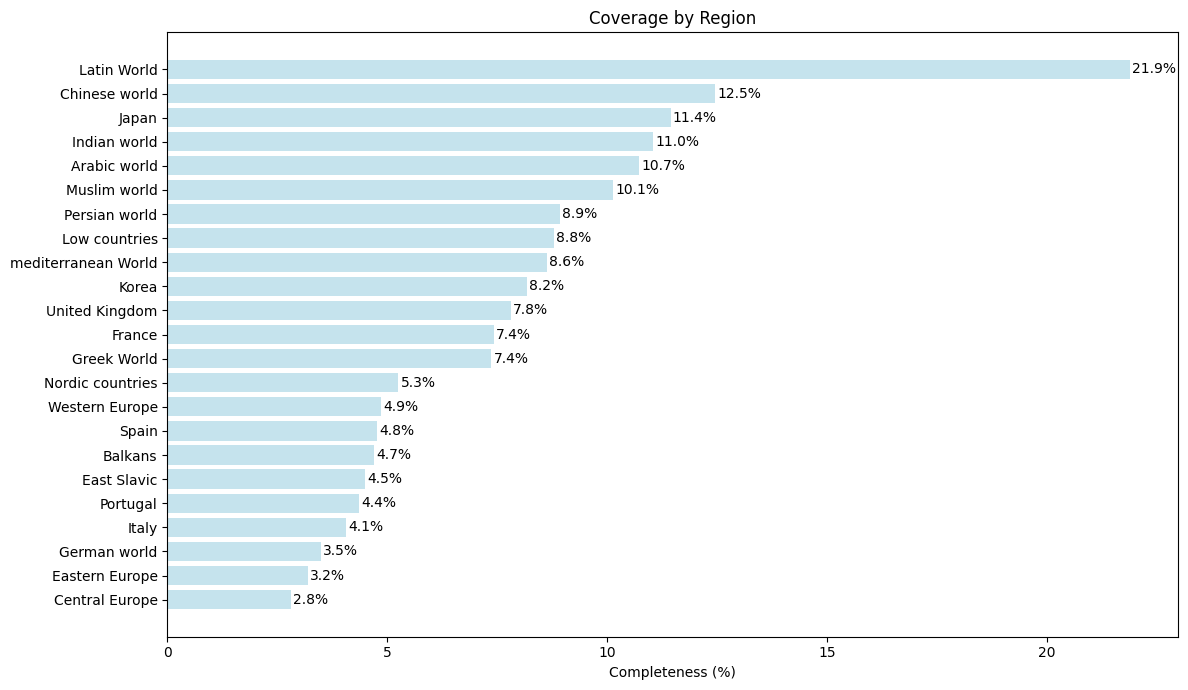

In [62]:

fig, ax = plt.subplots(figsize=(12, 7))
bars = ax.barh(data_group['region_name'], data_group['coverage']*100, color='lightblue', alpha=0.7)

ax.set_xlabel('Completeness (%)')
ax.set_ylabel('')
ax.set_title('Coverage by Region')

# Add values at the end of each bar
for bar in bars:
    width = bar.get_width()
    label = f'{width:.1f}%'
    x_pos = width + 0.05
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(x_pos, y_pos, label, ha='left', va='center')
plt.tight_layout()
plt.show()


In [2]:
# Coverage = number of f1/N Alan Turing
# Chao 1984
# Soviet guy for the star
# 3 times i has been re-discovered
# 2007 Turing Chao
# 1956 coverage; gives tge porbability if I find something new it belongs to some class I already Seen, not need the unseen species model
# 5%: I have 5% of change of fingin somethign I arelady know


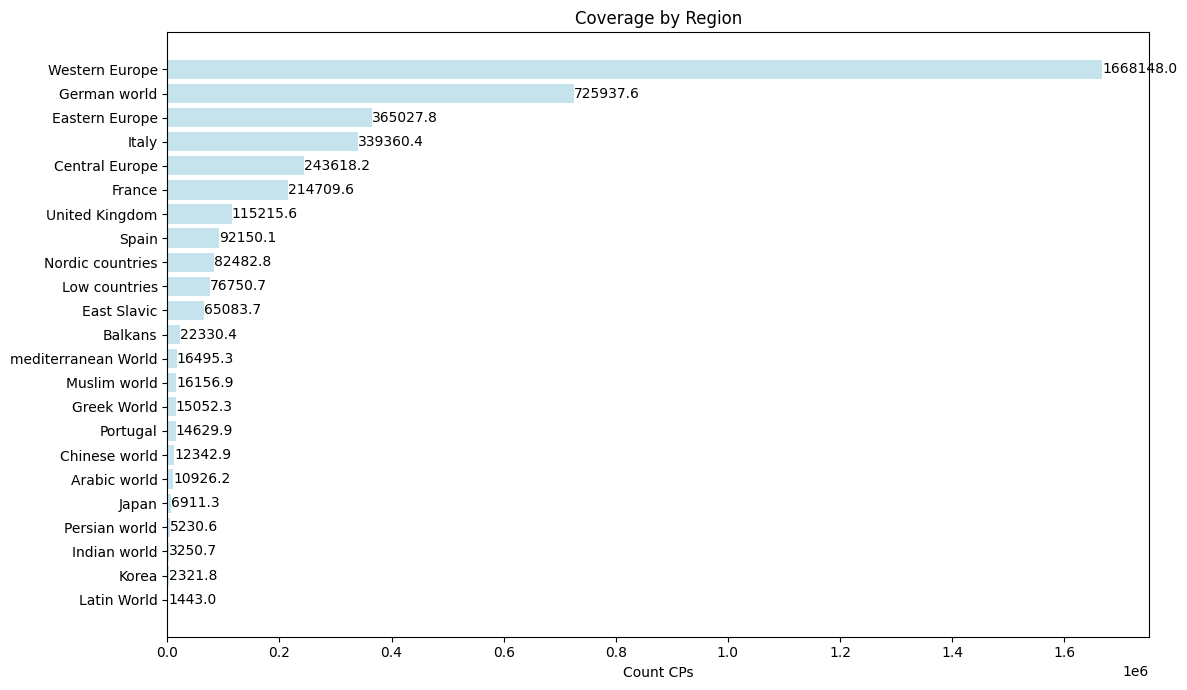

In [63]:
data_group = data_sorted.groupby('region_name')['N_est'].sum().rename('Count CPs').reset_index()
data_group = data_group.sort_values('Count CPs', ascending=True)

fig, ax = plt.subplots(figsize=(12, 7))
bars = ax.barh(data_group['region_name'], data_group['Count CPs'], color='lightblue', alpha=0.7)

ax.set_xlabel('Count CPs')
ax.set_ylabel('')
ax.set_title('Coverage by Region')

# Add values at the end of each bar
for bar in bars:
    width = bar.get_width()
    label = f'{width:.1f}'
    x_pos = width + 0.05
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(x_pos, y_pos, label, ha='left', va='center')
plt.tight_layout()
plt.show()

,region_name,decade,count_cps,N_est,lower,upper
396,Chinese world,0,1,4.787995,3.797216,5.872317
397,Chinese world,60,2,8.275549,6.471597,10.257122
398,Chinese world,70,1,4.644627,3.602461,5.784990
399,Chinese world,100,1,4.476951,3.466474,5.605234
400,Chinese world,110,1,4.404782,3.406613,5.509428
...,...,...,...,...,...,...
144,Western Europe,1820,4194,90214.001619,81096.447341,99813.290719
145,Western Europe,1830,4318,88776.055198,80146.940202,97849.414366
146,Western Europe,1840,7706,158397.313912,142708.966027,174942.293795
147,Western Europe,1850,7064,143879.927980,129280.535563,159290.324003


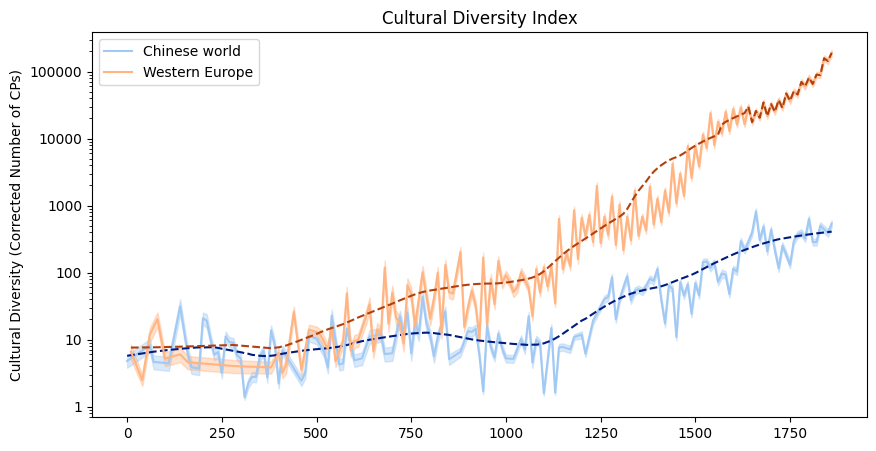

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from matplotlib.ticker import ScalarFormatter


regions = ['Chinese world', 'United Kingdom']
regions = ['Chinese world', 'Western Europe']
filtered_data = data_sorted[data_sorted['region_name'].isin(regions)]
filtered_data = filtered_data[filtered_data['decade'] >= 0]
filtered_data = filtered_data.sort_values(['region_name', 'decade'])

filtered_data 

fig, ax = plt.subplots(figsize=(10, 5))

# Define the number of colors you want
num_colors = 2

# Generate a list of light colors
light_colors = sns.color_palette("pastel", num_colors)

# Generate a list of dark colors
dark_colors = sns.color_palette("dark", num_colors)

for region, light_color, dark_color in zip(regions, light_colors, dark_colors):
    data_filtered = filtered_data[filtered_data['region_name'] == region]
    ax.plot(data_filtered['decade'], data_filtered['N_est'], label=region, color=light_color)
    ax.fill_between(data_filtered['decade'], data_filtered['lower'], data_filtered['upper'], alpha=0.4, color=light_color)

    # Add lowess smooth with more volatility
    lowess = sm.nonparametric.lowess(data_filtered['N_est'], data_filtered['decade'], frac=0.2)
    ax.plot(data_filtered['decade'], lowess[:, 1], color=dark_color, linestyle='--')

ax.set_title('Cultural Diversity Index')
ax.set_xlabel('')
ax.set_ylabel('Cultural Diversity (Corrected Number of CPs)')
ax.set_yscale('log')
ax.legend()

# Set the y-axis formatter to display full integers
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

plt.show()

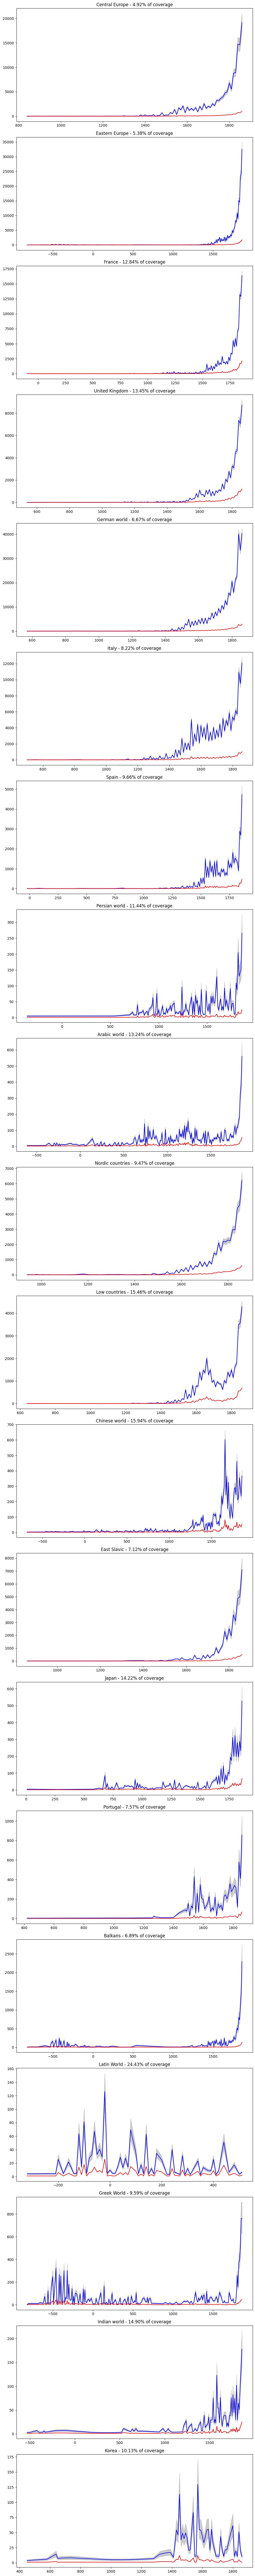

In [5]:
import pandas as pd

data = pd.read_csv('../results/occupation/unseen_data.csv', index_col=0)

fig, axs = plt.subplots(len(data['region_name'].unique()), 1, figsize=(10, 5*len(data['region_name'].unique())))

for i, region in enumerate(data['region_name'].unique()):
    data_filtered = data[data['region_name'] == region]
    coverage = data_filtered['count_cps'].sum() / data_filtered['N_est'].sum() * 100
    axs[i].plot(data_filtered['decade'], data_filtered['N_est'], color='blue')
    axs[i].plot(data_filtered['decade'], data_filtered['count_cps'], color='red')
    axs[i].fill_between(data_filtered['decade'], data_filtered['lower'], data_filtered['upper'], alpha=0.4, color='grey')
    axs[i].set_title(f"{region} - {coverage:.2f}% of coverage")
    #axs[i].set_yscale('log')

    axs[i].yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

plt.tight_layout()
plt.show()

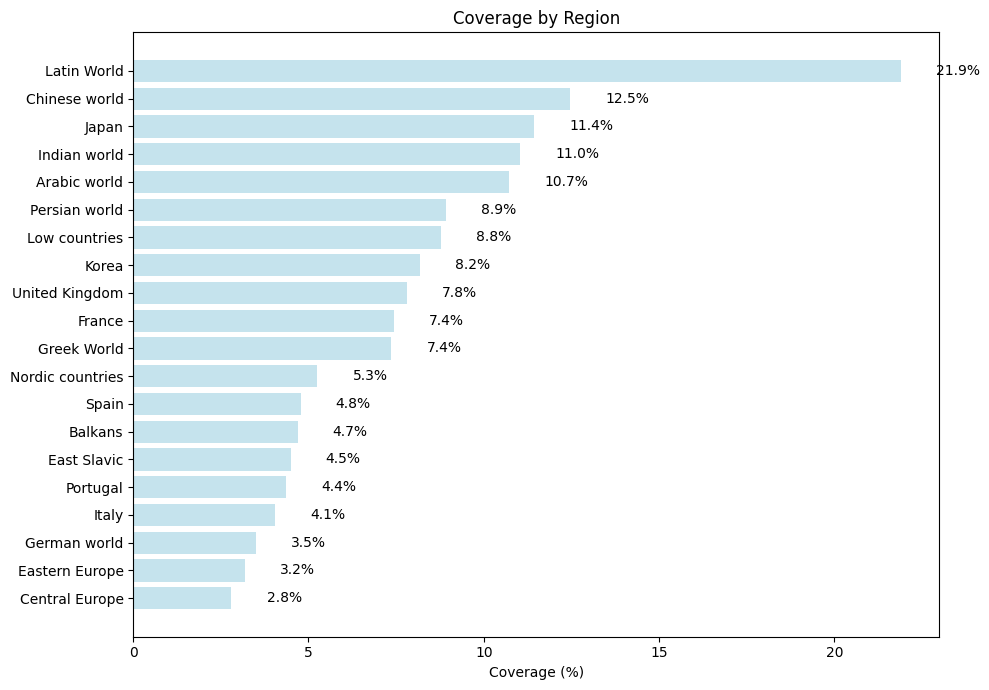

In [6]:
data_occupation = pd.read_csv('../results/occupation/unseen_data_occupation.csv', index_col=0)
data_occupation = data_occupation.drop(['occupation', 'model_type'], axis=1)
data_occupation = data_occupation.groupby(['region_name','decade']).sum().reset_index()


data_sorted = data_occupation.sort_values(by='count_cps', ascending=False)
data_group = (data_sorted.groupby('region_name')['count_cps'].sum() / data_sorted.groupby('region_name')['N_est'].sum()).rename('coverage').reset_index()
data_group = data_group.sort_values('coverage', ascending=True)

fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.barh(data_group['region_name'], data_group['coverage']*100, color='lightblue', alpha=0.7)

ax.set_xlabel('Coverage (%)')
ax.set_ylabel('')
ax.set_title('Coverage by Region')

# Add values at the end of each bar
for bar in bars:
    width = bar.get_width()
    label = f'{width:.1f}%'
    x_pos = width + 1
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(x_pos, y_pos, label, ha='left', va='center')

# Set the y-axis formatter to display full integers

plt.tight_layout()
plt.show()

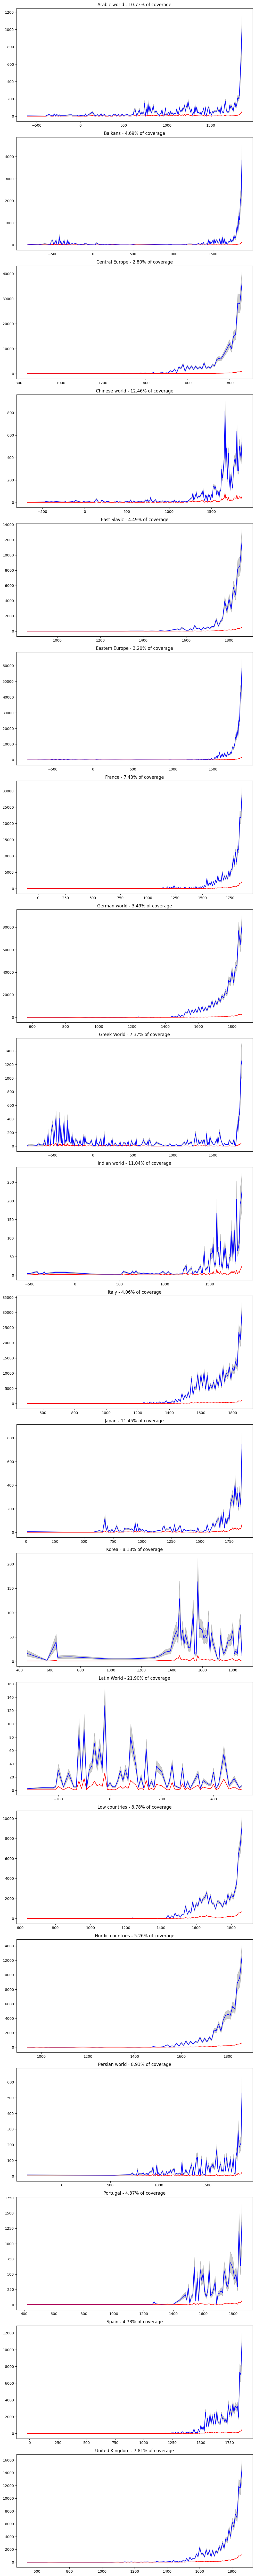

In [7]:
data = data_occupation.copy()


fig, axs = plt.subplots(len(data['region_name'].unique()), 1, figsize=(10, 5*len(data['region_name'].unique())))

for i, region in enumerate(data['region_name'].unique()):
    data_filtered = data[data['region_name'] == region]
    coverage = data_filtered['count_cps'].sum() / data_filtered['N_est'].sum() * 100
    axs[i].plot(data_filtered['decade'], data_filtered['N_est'], color='blue')
    axs[i].plot(data_filtered['decade'], data_filtered['count_cps'], color='red')
    axs[i].fill_between(data_filtered['decade'], data_filtered['lower'], data_filtered['upper'], alpha=0.4, color='grey')
    axs[i].set_title(f"{region} - {coverage:.2f}% of coverage")

plt.tight_layout()
plt.show()

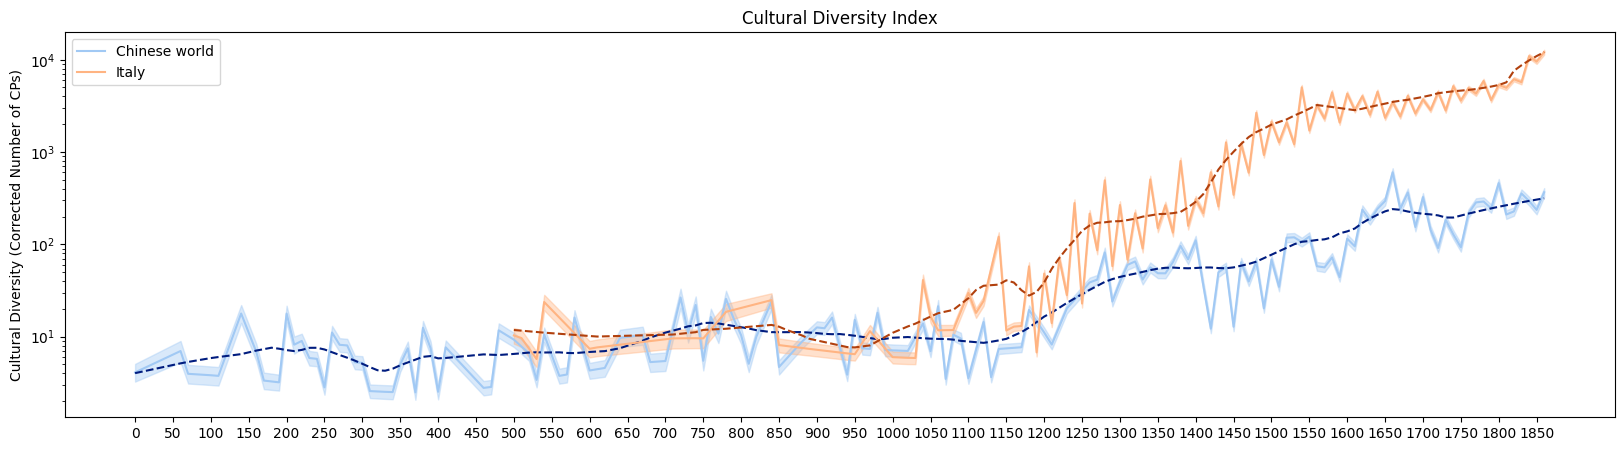

In [8]:
fig, ax = plt.subplots(figsize=(20, 5))

# Define the number of colors you want
num_colors = 2

# Generate a list of light colors
light_colors = sns.color_palette("pastel", num_colors)

# Generate a list of dark colors
dark_colors = sns.color_palette("dark", num_colors)

lowess_dict = []
for region, light_color, dark_color in zip(regions, light_colors, dark_colors):
    data_filtered = filtered_data[filtered_data['region_name'] == region]
    ax.plot(data_filtered['decade'], data_filtered['N_est'], label=region, color=light_color)
    ax.fill_between(data_filtered['decade'], data_filtered['lower'], data_filtered['upper'], alpha=0.4, color=light_color)

    # Add lowess smooth with more volatility
    lowess = sm.nonparametric.lowess(data_filtered['N_est'], data_filtered['decade'], frac=0.1)
    ax.plot(data_filtered['decade'], lowess[:, 1], color=dark_color, linestyle='--')

    res = {'region_name': region, 'decade': list(data_filtered['decade']), 'N_est': list(data_filtered['N_est']), 'lowess': lowess[:, 1]}
    lowess_dict.append(res)

ax.set_title('Cultural Diversity Index')
ax.set_xlabel('')
ax.set_ylabel('Cultural Diversity (Corrected Number of CPs)')
ax.set_yscale('log')
ax.legend()

# Add xticks every 10 years
ax.set_xticks(range(0, max(filtered_data['decade'])+1, 50))

plt.show()

In [9]:
final_lowess = pd.DataFrame(lowess_dict)
final_lowess = final_lowess.explode(['decade', 'N_est','lowess'])
final_lowess = final_lowess.reset_index(drop=True)




test = final_lowess[final_lowess['decade']>=1300]
test.head(50)

,region_name,decade,N_est,lowess
96,Chinese world,1300,39.155728,44.331419
97,Chinese world,1310,59.923992,46.306948
98,Chinese world,1320,65.220931,48.134711
99,Chinese world,1330,41.560453,50.220469
100,Chinese world,1340,56.266014,52.494942
101,Chinese world,1350,48.593683,54.48024
102,Chinese world,1360,48.518266,55.659735
103,Chinese world,1370,64.258856,55.992149
104,Chinese world,1380,96.031113,55.313239
105,Chinese world,1390,68.722772,55.022613
